# 1/ Nettoyage des données - Partie agriculture 

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
df_agriculture = pd.ExcelFile("AGRIBALYSE3_partie agriculture.xlsx")

## Tableau 1 : produits non organiques 

In [19]:
df_agri_normal= pd.read_excel(df_agriculture,"AGB_agri", header=1)
df_agri_normal.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Climate change,Ozone depletion,"Ionising radiation, HH","Photochemical ozone formation, HH",Respiratory inorganics,Acidification terrestrial and freshwater,Eutrophication freshwater,Eutrophication marine,Eutrophication terrestrial,Ecotoxicity freshwater,Land use,Water scarcity,"Resource use, energy carriers","Resource use, mineral and metals",Climate change - fossil,Climate change - biogenic,Climate change - land use and transform.
0,Nom du Produit en Français (traduction approxi...,LCI Name,Catégorie,kg CO2 eq,kg CFC11 eq,kBq U-235 eq,kg NMVOC eq,disease inc.,mol H+ eq,kg P eq,kg N eq,mol N eq,CTUe,Pt,m3 depriv.,MJ,kg Sb eq,kg CO2 eq,kg CO2 eq,kg CO2 eq
1,"Poulet, Bleu Blanc Coeur, at farm gate/FR U","Broiler; Bleu Blanc Coeur, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,1.44744,1.11454e-07,0.170576,0.00462458,3.2014e-07,0.0472122,0.000409922,0.0121022,0.206126,7.07602,407.081,2.80008,11.7442,1.9819e-06,1.21275,0.0524333,0.182264
2,"Poulet, conventionnel, départ ferme / FR U","Broiler, conventional, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,1.87453,1.45069e-07,0.219829,0.00632978,3.38427e-07,0.0493909,0.000515423,0.011752,0.212471,4.41402,361.946,3.17131,15.1538,2.63833e-06,1.38492,0.0503386,0.439274
3,"Poulet, Label Rouge, à la de la ferme / FR U","Broiler, Label Rouge, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,2.82659,2.12771e-07,0.282615,0.0088557,5.4779e-07,0.0800916,0.000695502,0.0192948,0.346505,6.22928,590.335,4.13862,22.5108,3.72577e-06,2.26923,0.0653645,0.491993
4,"Poulet, moyenne nationale, à la de la ferme /...","Broiler, national average, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,1.99191,1.53468e-07,0.227954,0.00664452,3.64812e-07,0.0532605,0.000538273,0.0127541,0.229395,4.64346,393.392,3.29654,16.0754,2.77311e-06,1.4961,0.0522831,0.443529


Enlevons toutes les colonnes inutiles avant de renommer les autres et de clarifier le décalage de lignes. 

In [20]:
df_agri_normal.drop(['Unnamed: 1', 'Climate change - fossil', 'Climate change - biogenic','Climate change - land use and transform.'], axis='columns', inplace=True)
df_agri_nonbio = df_agri_normal.rename(columns={'Unnamed: 0':'Nom du produit', 'Unnamed: 2':'Catégorie', 'Climate change': 'Changement climatique (en eq. kg CO2)', 'Ozone depletion': 'Appauvrissement de la couche d ozone (en eq. kg CFC11)','Ionising radiation, HH':'Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)', 'Photochemical ozone formation, HH':'Formation d ozone photochimique (en eq. kg NMVOC)', 'Respiratory inorganics':'Substances inorganiques respiratoires (incidence de maladie)', 'Acidification terrestrial and freshwater':'Acidification (eq. mol H+)', 'Eutrophication freshwater': 'Eutrophisation eau douce (en eq. kg P)', 'Eutrophication marine':'Eutrophisation marine (en eq. kg N)', 'Eutrophication terrestrial':'Eutrophisation terrestre (en eq. mol N)', 'Ecotoxicity freshwater':'Ecotoxicité d eau douce (en CTUe)', 'Land use': 'Usage des terres (en Pt)', 'Water scarcity':'Epuisement des ressources en eau (en m3 Eau)', 'Resource use, energy carriers': 'Epuisement des ressources énergétiques (en MJ)', 'Resource use, mineral and metals': 'Epuisement des ressources minéraux (en eq. kg Sb)'}).copy()

In [21]:
df_agri_nonbio.drop([0],inplace = True)

Cependant, certains indicateurs sont considérés comme peu très peu robsutes. Enlevons les de nos données. 

In [22]:
df_agri_nonbio.drop(["Usage des terres (en Pt)","Ecotoxicité d eau douce (en CTUe)", "Epuisement des ressources énergétiques (en MJ)","Epuisement des ressources minéraux (en eq. kg Sb)", "Epuisement des ressources en eau (en m3 Eau)"], axis ="columns", inplace=True)
df_agri_nonbio

,Nom du produit,Catégorie,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
1,"Poulet, Bleu Blanc Coeur, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,1.44744,1.11454e-07,0.170576,0.00462458,3.2014e-07,0.0472122,0.000409922,0.0121022,0.206126
2,"Poulet, conventionnel, départ ferme / FR U",Agricultural\Animal production\Avian\Transform...,1.87453,1.45069e-07,0.219829,0.00632978,3.38427e-07,0.0493909,0.000515423,0.011752,0.212471
3,"Poulet, Label Rouge, à la de la ferme / FR U",Agricultural\Animal production\Avian\Transform...,2.82659,2.12771e-07,0.282615,0.0088557,5.4779e-07,0.0800916,0.000695502,0.0192948,0.346505
4,"Poulet, moyenne nationale, à la de la ferme /...",Agricultural\Animal production\Avian\Transform...,1.99191,1.53468e-07,0.227954,0.00664452,3.64812e-07,0.0532605,0.000538273,0.0127541,0.229395
5,"Canard à rôtir, conventionnel, à la ferme / FR U",Agricultural\Animal production\Avian\Transform...,2.73995,1.77542e-07,0.259452,0.00804329,6.45601e-07,0.0940418,0.000629109,0.017566,0.411137
...,...,...,...,...,...,...,...,...,...,...,...
236,"Coquille Saint-Jacques, BSBrieuc, Dredge, en m...",Fishery\Fishery products\Great Scallop - BSBri...,0.682146,1.51873e-07,0.0469379,0.015236,1.53149e-07,0.0222052,7.69627e-05,0.0053051,0.0580929
237,"Hareng de l'Atlantique, NEA, Pelagic Chalut, e...",Fishery\Fishery products\Herring - NEA - Pelag...,0.527711,1.39792e-07,0.0342816,0.0114241,1.15001e-07,0.0167948,2.99752e-05,0.00398843,0.0436759
238,"Maquereau Atlantique, NEA, Pelagic Chalut, en ...",Fishery\Fishery products\Mackerel - NEA - Pela...,0.536571,1.44337e-07,0.0346309,0.0115305,1.161e-07,0.0169563,3.0752e-05,0.00402547,0.0440808
239,"Listao, la CEA, la Seine, en moyenne, à l'atte...",Fishery\Fishery products\Skipjack Tuna - ECA -...,1.90547,4.26215e-07,0.132283,0.0433651,4.36195e-07,0.0634919,0.000127922,0.0152165,0.166519


## Tableau 2: produits organiques 

Nous traitons de la même manière les données sur les produits agricoles organiques : 

In [23]:
df_agri_organic= pd.read_excel(df_agriculture,"AGB organic product", header=1)
df_agri_organic

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Climate change,Ozone depletion,"Ionising radiation, HH","Photochemical ozone formation, HH",Respiratory inorganics,Acidification terrestrial and freshwater,Eutrophication freshwater,Eutrophication marine,Eutrophication terrestrial,Ecotoxicity freshwater,Land use,Water scarcity,"Resource use, energy carriers","Resource use, mineral and metals",Climate change - fossil,Climate change - biogenic,Climate change - land use and transform.
0,Nom du Produit en Français (traduction approxi...,LCI Name,Catégorie,kg CO2 eq,kg CFC11 eq,kBq U-235 eq,kg NMVOC eq,disease inc.,mol H+ eq,kg P eq,kg N eq,mol N eq,CTUe,Pt,m3 depriv.,MJ,kg Sb eq,kg CO2 eq,kg CO2 eq,kg CO2 eq
1,"Poulet, biologique, à la ferme / FR U","Broiler, organic, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,2.50144,2.00028e-07,0.338122,0.00865668,5.90742e-07,0.0865018,0.000763565,0.0311399,0.380357,6.73638,1169.69,5.00242,22.8953,3.49668e-06,2.39772,0.0786133,0.0251042
2,"Poulet, biologique, système n ° 1, à la ferme ...","Chicken, organic, system n°1, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,3.36722,2.23134e-07,0.370369,0.00973865,6.40683e-07,0.0967691,0.00110792,0.0358753,0.41902,23.944,1255.45,11.546,24.3408,4.34773e-06,2.4025,0.0729842,0.891736
3,"Poulet, biologique, système n ° 2, à la ferme ...","Chicken, organic, system n°2, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,3.35622,2.19161e-07,0.346624,0.00997517,6.26829e-07,0.095043,0.00112005,0.0373553,0.411431,25.3122,1317.46,10.595,23.5104,3.78385e-06,2.38598,0.0728312,0.897412
4,"poule Réforme, porte biologique, à la ferme / ...","Cull hen, organic, at farm gate/FR U",Agricultural\Animal production\Avian\Transform...,4.92108,4.28126e-07,0.878833,0.0134483,8.59302e-07,0.12478,0.00104827,0.0239226,0.536996,8.69919,709.123,5.58676,54.2458,6.35095e-06,4.1736,0.104462,0.643019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,"Endive, saison, biologique, la production de r...","Chicory witloof, season, organic, root product...",Agricultural\Plant production\Vegetables\Trans...,0.104195,1.68095e-08,0.0150682,0.000849985,2.13937e-09,0.000787174,3.95252e-05,0.00199601,0.00315562,0.181554,79.9808,0.25924,1.30194,6.85497e-07,0.1041,5.76331e-05,3.76168e-05
216,"Endive, saison, biologique, de stockage et de ...","Chicory witloof, season, organic, storage and ...",Agricultural\Plant production\Vegetables\Trans...,0.365555,1.70762e-07,0.38299,0.000350107,7.12231e-09,0.000670288,4.86301e-05,0.000125162,0.00171894,0.141199,0.664776,0.326625,9.07904,2.17791e-06,0.365232,0.000259544,6.32677e-05
217,"Melon, biologique, à la ferme / FR U","Melon, organic, at farm gate/FR U",Agricultural\Plant production\Vegetables\Trans...,0.146348,2.13801e-08,0.0455289,0.00106859,6.80753e-09,0.00139957,9.58041e-05,0.0027198,0.00556531,1.06876,65.2404,4.92975,3.53158,8.04468e-07,0.146131,0.000135776,8.15421e-05
218,"Courge, printemps, sous tunnel, porte biologiq...","Squash, springtime, under tunnel, organic, at ...",Agricultural\Plant production\Vegetables\Trans...,0.161423,1.6041e-08,0.0419865,0.000773917,9.47409e-09,0.00171381,3.80417e-05,0.00051385,0.00914471,0.891971,0.348728,3.41764,3.23764,4.73031e-06,0.157844,0.00347816,0.000100706


In [24]:
df_agri_organic.drop(['Unnamed: 1', 'Climate change - fossil', 'Climate change - biogenic', 'Climate change - land use and transform.'], axis ="columns", inplace= True )
df_agri_bio = df_agri_organic.rename(columns={'Unnamed: 0':'Nom du produit', 'Unnamed: 2':'Catégorie', 'Climate change': 'Changement climatique (en eq. kg CO2)', 'Ozone depletion': 'Appauvrissement de la couche d ozone (en eq. kg CFC11)','Ionising radiation, HH':'Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)', 'Photochemical ozone formation, HH':'Formation d ozone photochimique (en eq. kg NMVOC)', 'Respiratory inorganics':'Substances inorganiques respiratoires (incidence de maladie)', 'Acidification terrestrial and freshwater':'Acidification (eq. mol H+)', 'Eutrophication freshwater': 'Eutrophisation eau douce (en eq. kg P)', 'Eutrophication marine':'Eutrophisation marine (en eq. kg N)', 'Eutrophication terrestrial':'Eutrophisation terrestre (en eq. mol N)', 'Ecotoxicity freshwater':'Ecotoxicité d eau douce (en CTUe)', 'Land use': 'Usage des terres (en Pt)', 'Water scarcity':'Epuisement des ressources en eau (en m3 Eau)', 'Resource use, energy carriers': 'Epuisement des ressources énergétiques (en MJ)', 'Resource use, mineral and metals': 'Epuisement des ressources minéraux (en eq. kg Sb)'}).copy()

In [25]:
df_agri_bio.drop([0], inplace = True)

In [26]:
df_agri_bio.drop(["Usage des terres (en Pt)","Ecotoxicité d eau douce (en CTUe)", "Epuisement des ressources énergétiques (en MJ)","Epuisement des ressources minéraux (en eq. kg Sb)", "Epuisement des ressources en eau (en m3 Eau)"], axis ="columns", inplace=True)
df_agri_bio

,Nom du produit,Catégorie,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
1,"Poulet, biologique, à la ferme / FR U",Agricultural\Animal production\Avian\Transform...,2.50144,2.00028e-07,0.338122,0.00865668,5.90742e-07,0.0865018,0.000763565,0.0311399,0.380357
2,"Poulet, biologique, système n ° 1, à la ferme ...",Agricultural\Animal production\Avian\Transform...,3.36722,2.23134e-07,0.370369,0.00973865,6.40683e-07,0.0967691,0.00110792,0.0358753,0.41902
3,"Poulet, biologique, système n ° 2, à la ferme ...",Agricultural\Animal production\Avian\Transform...,3.35622,2.19161e-07,0.346624,0.00997517,6.26829e-07,0.095043,0.00112005,0.0373553,0.411431
4,"poule Réforme, porte biologique, à la ferme / ...",Agricultural\Animal production\Avian\Transform...,4.92108,4.28126e-07,0.878833,0.0134483,8.59302e-07,0.12478,0.00104827,0.0239226,0.536996
5,"Réforme poule, biologique, système n ° 1, à la...",Agricultural\Animal production\Avian\Transform...,9.14596,7.24577e-07,1.27946,0.0284353,2.1249e-06,0.309146,0.00228231,0.0577689,1.34246
...,...,...,...,...,...,...,...,...,...,...,...
215,"Endive, saison, biologique, la production de r...",Agricultural\Plant production\Vegetables\Trans...,0.104195,1.68095e-08,0.0150682,0.000849985,2.13937e-09,0.000787174,3.95252e-05,0.00199601,0.00315562
216,"Endive, saison, biologique, de stockage et de ...",Agricultural\Plant production\Vegetables\Trans...,0.365555,1.70762e-07,0.38299,0.000350107,7.12231e-09,0.000670288,4.86301e-05,0.000125162,0.00171894
217,"Melon, biologique, à la ferme / FR U",Agricultural\Plant production\Vegetables\Trans...,0.146348,2.13801e-08,0.0455289,0.00106859,6.80753e-09,0.00139957,9.58041e-05,0.0027198,0.00556531
218,"Courge, printemps, sous tunnel, porte biologiq...",Agricultural\Plant production\Vegetables\Trans...,0.161423,1.6041e-08,0.0419865,0.000773917,9.47409e-09,0.00171381,3.80417e-05,0.00051385,0.00914471


# 2/ Analyse et visualisation 

Quel est le plus gros pb environnemental causé par l’agriculture ? Regarder par catégorie d’aliment
Quel type de pratique agricole impacte le plus l’environnement ?
Quelles différences entre bio et non-bio ?

## 1er tableau - Produits non bio 

In [27]:
df_agri_nonbio.mean()

Changement climatique (en eq. kg CO2)                            1.049320e+00
Appauvrissement de la couche d ozone (en eq. kg CFC11)           9.521967e-08
Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)    1.085615e-01
Formation d ozone photochimique (en eq. kg NMVOC)                5.163170e-03
Substances inorganiques respiratoires (incidence de maladie)     1.636942e-07
Acidification (eq. mol H+)                                       1.964121e-02
Eutrophisation eau douce (en eq. kg P)                           3.173022e-04
Eutrophisation marine (en eq. kg N)                              8.635712e-03
Eutrophisation terrestre (en eq. mol N)                          7.939690e-02
dtype: float64

Maintenant que nous avons une idée des impactes moyens engendrés par l'agriculture de nos aliments, recentrons nos analyses sur les catégories (viandes bovines, porcines, poissons, légumes, etc). Quelles sont celles qui ont un plus fort impacte. Engendrent-elles des conséquences sur nos indicateurs dans les memes proportions ? 

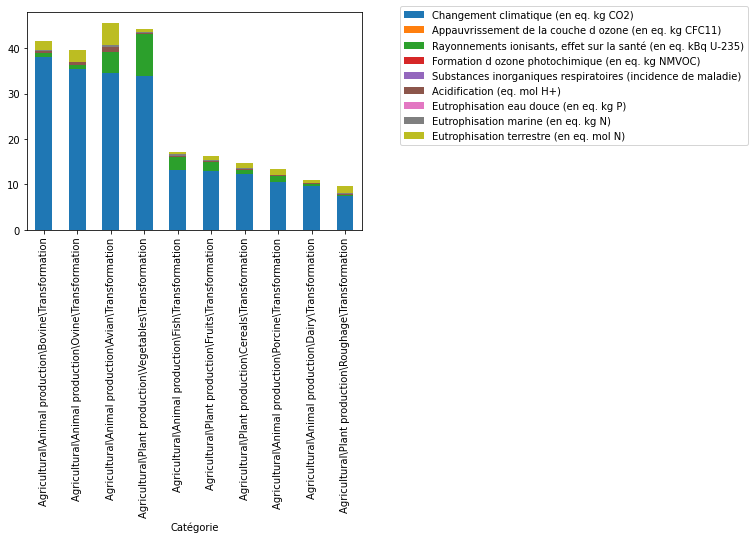

In [28]:
df_agri_nonbio.groupby("Catégorie").sum().sort_values('Changement climatique (en eq. kg CO2)', ascending = False).head(10).plot(kind="bar", stacked = True).legend(bbox_to_anchor=(1.1,1.05))

Nous pouvons tirer deux observations de ce graphique : la première c'est que deux groupes se distinguent particulièrement (la viande bovine, ovie et aviane ainsique que les légumes en "gros pollueurs", les autres plus bas).La seconde est le large impacte en rayonnements ionisants et effets sur la santé provoqué par l'agriculture des légumes. 

Concentrons nous désormais sur le changement climatique, sachant que cet indicateur est répertorié comme le plus robustes par Agribalyse. 

In [29]:
df_agri_nonbio_changement_climatique = df_agri_nonbio[["Nom du produit",'Changement climatique (en eq. kg CO2)']].sort_values('Changement climatique (en eq. kg CO2)', ascending = False)
df_agri_nonbio_changement_climatique

,Nom du produit,Changement climatique (en eq. kg CO2)
17,Génisse allaitante système d'engraissement co...,20.9806
31,"Agneau système de production conventionnel, à ...",19.5897
16,"Boeuf, moyenne nationale, à la de la ferme / ...",16.9856
32,"Agneau, conventionnel, système Roquefort, à la...",5.28971
34,"Laine, conventionnel, système Roquefort, à la ...",5.22663
...,...,...
200,"Oignon conventionnel, jour court semé, à la fe...",0.0540012
199,"Oignon conventionnel, moyenne nationale, à la ...",0.0539465
198,"Oignon conventionnel, jour long semé, à la fer...",0.0453794
164,"Carotte conventionnelle de saison, avec l'empr...",0.0426529


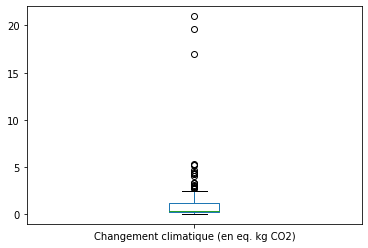

In [30]:
df_agri_nonbio_changement_climatique.plot(kind='box')

In [31]:
df_agri_nonbio_cat= df_agri_nonbio[["Catégorie","Changement climatique (en eq. kg CO2)"]].groupby(by = 'Catégorie').sum().sort_values('Changement climatique (en eq. kg CO2)', ascending = False).copy()
df_agri_nonbio_cat

,Changement climatique (en eq. kg CO2)
Catégorie,
Agricultural\Animal production\Bovine\Transformation,37.966201
Agricultural\Animal production\Ovine\Transformation,35.312712
Agricultural\Animal production\Avian\Transformation,34.620173
Agricultural\Plant production\Vegetables\Transformation,33.896703
Agricultural\Animal production\Fish\Transformation,13.113198
Agricultural\Plant production\Fruits\Transformation,12.977493
Agricultural\Plant production\Cereals\Transformation,12.383102
Agricultural\Animal production\Porcine\Transformation,10.589155
Agricultural\Animal production\Dairy\Transformation,9.630046


In [32]:
df_agri_nonbio_cat[["Changement climatique (en eq. kg CO2)"]].describe()

,Changement climatique (en eq. kg CO2)
count,33.000000
mean,7.631415
std,11.209741
min,0.139501
25%,0.682146
50%,2.168957
75%,9.630046
max,37.966201


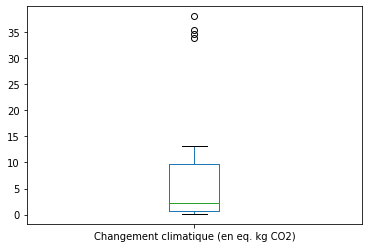

In [33]:
df_agri_nonbio_cat.plot(kind='box')

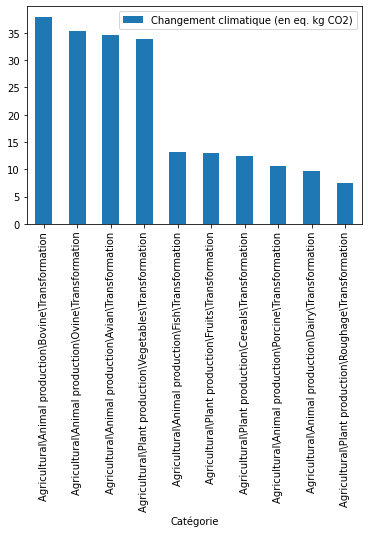

In [34]:
df_agri_nonbio_cat.head(10).plot(kind='bar', stacked = True)

## 2ème tableau : Produits issus d'agriculture biologique 

On procède exactement de la même façon pour les produits biologiques. 

In [35]:
df_agri_bio.mean()

Changement climatique (en eq. kg CO2)                            2.584709e+00
Appauvrissement de la couche d ozone (en eq. kg CFC11)           8.166867e-08
Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)    1.274199e-01
Formation d ozone photochimique (en eq. kg NMVOC)                4.707805e-03
Substances inorganiques respiratoires (incidence de maladie)     2.514717e-07
Acidification (eq. mol H+)                                       3.823967e-02
Eutrophisation eau douce (en eq. kg P)                           4.023537e-04
Eutrophisation marine (en eq. kg N)                              2.003957e-02
Eutrophisation terrestre (en eq. mol N)                          1.693003e-01
dtype: float64

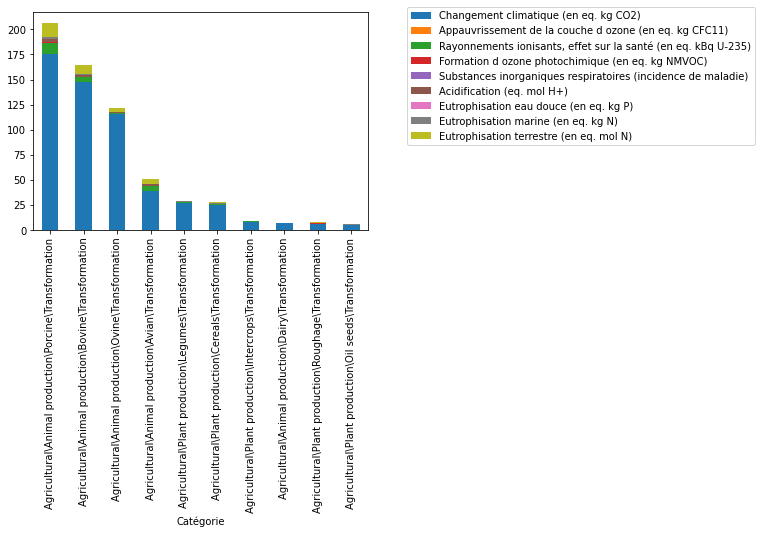

In [36]:
df_agri_bio.groupby("Catégorie").sum().sort_values('Changement climatique (en eq. kg CO2)', ascending = False).head(10).plot(kind="bar", stacked = True).legend(bbox_to_anchor=(1.1,1.05))

Ici, la viande est toujours en tête, mais cette fois ci, il apparait que les légumes n'ont aucun effet sur les rayonnements ionisants. 

In [37]:
df_agri_bio_changement_climatique = df_agri_bio[["Nom du produit",'Changement climatique (en eq. kg CO2)']].sort_values('Changement climatique (en eq. kg CO2)', ascending = False).head(10)
df_agri_bio_changement_climatique

,Nom du produit,Changement climatique (en eq. kg CO2)
41,"Réforme truie, biologique, système n ° 3, à la...",59.8712
42,"Réforme truie, biologique, système n ° 4, à la...",39.5717
33,"Lamb, biologique, système n ° 3, à la ferme / ...",25.3612
30,"Réforme brebis, biologique, système n ° 3, à l...",20.6825
29,"Réforme brebis, biologique, système n ° 2, à l...",17.9928
18,"vache Réforme, biologique, système n ° 2, à la...",17.8022
17,"vache Réforme, biologique, système n ° 1, à la...",17.0603
10,"Veau, 13 jours, biologique, plaine système de ...",16.0572
31,"Lamb, biologique, système n ° 1, à la ferme / ...",15.0398
38,"truie Réforme, moyenne biologique, national, à...",13.0708


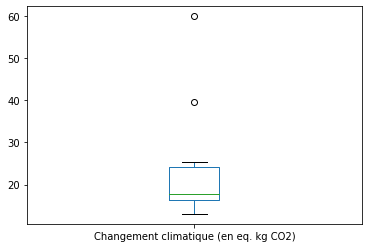

In [38]:
df_agri_bio_changement_climatique.plot(kind='box')

In [39]:
df_agri_bio.sort_values('Changement climatique (en eq. kg CO2)', ascending = False).head(5)

,Nom du produit,Catégorie,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
41,"Réforme truie, biologique, système n ° 3, à la...",Agricultural\Animal production\Porcine\Transfo...,59.8712,1.65573e-06,6.39518,0.0786112,7.88055e-06,1.16142,0.0075688,0.347734,5.12577
42,"Réforme truie, biologique, système n ° 4, à la...",Agricultural\Animal production\Porcine\Transfo...,39.5717,1.52977e-06,1.39831,0.0788844,3.3942e-06,0.525089,0.00851806,0.389664,2.30291
33,"Lamb, biologique, système n ° 3, à la ferme / ...",Agricultural\Animal production\Ovine\Transform...,25.3612,2.54078e-07,0.186617,0.0261364,1.82493e-06,0.274535,0.00188131,0.203472,1.23106
30,"Réforme brebis, biologique, système n ° 3, à l...",Agricultural\Animal production\Ovine\Transform...,20.6825,1.17452e-07,0.0665319,0.0176785,1.1334e-06,0.171118,0.00147182,0.196847,0.769947
29,"Réforme brebis, biologique, système n ° 2, à l...",Agricultural\Animal production\Ovine\Transform...,17.9928,1.51851e-07,0.0899859,0.0183872,5.248e-07,0.0840517,0.000739965,0.0581569,0.380074


In [40]:
df_agri_bio_cat= df_agri_bio[["Catégorie","Changement climatique (en eq. kg CO2)"]].groupby(by = 'Catégorie').sum().sort_values('Changement climatique (en eq. kg CO2)', ascending = False).copy()
df_agri_bio_cat

,Changement climatique (en eq. kg CO2)
Catégorie,
Agricultural\Animal production\Porcine\Transformation,175.015114
Agricultural\Animal production\Bovine\Transformation,147.492058
Agricultural\Animal production\Ovine\Transformation,115.679525
Agricultural\Animal production\Avian\Transformation,38.542715
Agricultural\Plant production\Legumes\Transformation,26.788471
Agricultural\Plant production\Cereals\Transformation,24.765599
Agricultural\Plant production\Intercrops\Transformation,8.398198
Agricultural\Animal production\Dairy\Transformation,6.451675
Agricultural\Plant production\Roughage\Transformation,6.123840


In [41]:
df_agri_bio_cat[["Changement climatique (en eq. kg CO2)"]].describe()

,Changement climatique (en eq. kg CO2)
count,12.000000
mean,46.740156
std,62.206304
min,2.181802
25%,5.835888
50%,16.581899
75%,57.826918
max,175.015114


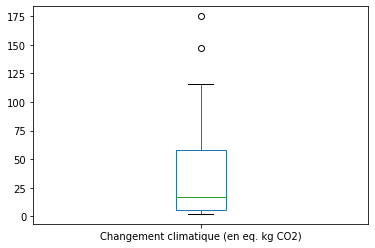

In [42]:
df_agri_bio_cat.plot(kind='box')

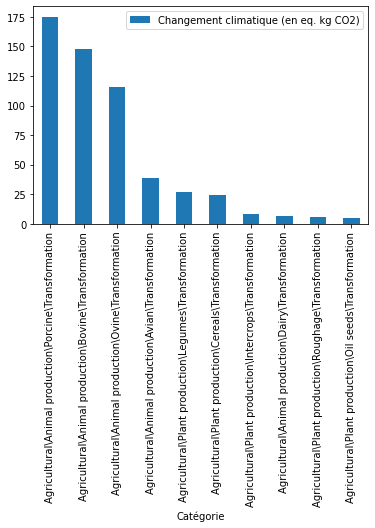

In [43]:
df_agri_bio_cat.head(10).plot(kind='bar', stacked = True)

## Comparaison BIO / NON BIO

In [44]:
df_new_line_bio = pd.DataFrame([df_agri_bio.mean()], columns = ["Changement climatique (en eq. kg CO2)","Appauvrissement de la couche d ozone (en eq. kg CFC11)","Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)","Formation d ozone photochimique (en eq. kg NMVOC)","Substances inorganiques respiratoires (incidence de maladie)","Acidification (eq. mol H+)","Eutrophisation eau douce (en eq. kg P)","Eutrophisation marine (en eq. kg N)","Eutrophisation terrestre (en eq. mol N)"])
df_new_line_nonbio = pd.DataFrame([df_agri_nonbio.mean()], columns = ["Changement climatique (en eq. kg CO2)","Appauvrissement de la couche d ozone (en eq. kg CFC11)","Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)","Formation d ozone photochimique (en eq. kg NMVOC)","Substances inorganiques respiratoires (incidence de maladie)","Acidification (eq. mol H+)","Eutrophisation eau douce (en eq. kg P)","Eutrophisation marine (en eq. kg N)","Eutrophisation terrestre (en eq. mol N)"])

,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
0,1.049320,9.521967e-08,0.108562,0.005163,1.636942e-07,0.019641,0.000317,0.008636,0.079397
1,2.584709,8.166867e-08,0.127420,0.004708,2.514717e-07,0.038240,0.000402,0.020040,0.169300


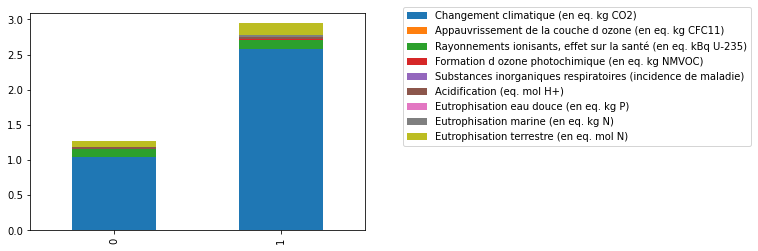

In [45]:
df_comparaison = pd.concat([df_new_line_nonbio,df_new_line_bio],ignore_index= True)
df_comparaison
df_comparaison.plot(kind='bar', stacked = True).legend(bbox_to_anchor=(1.1,1.05))

## Retour sur le tajine de mouton 

Regardons plus en détail l'empreinte agricole du tajine de mouton. D'après le tableau des ingrédients ci-dessus, le Tajine est composé de viande d'agneau, d'huile d'olive, d'oignons, de tomates, d'olives, de courgettes, de sucre blanc et de miel. 

Nous allons comparer tajine non biologique et tajine biologique. 

In [54]:
df_agri_tajine_nonbio = pd.concat([df_agri_nonbio[df_agri_nonbio["Nom du produit"]=="Agneau, conventionnel, système Roquefort, à la ferme / FR U"],df_agri_nonbio[df_agri_nonbio["Nom du produit"]=="Oignon conventionnel, moyenne nationale, à la ferme / FR U"],df_agri_nonbio[df_agri_nonbio["Nom du produit"]=="Tomate conventionnelle, panier moyen, serre chauffée, moyenne nationale, à la ferme / FR U"],df_agri_nonbio[df_agri_nonbio["Nom du produit"]=="Courgette conventionnelle, moyenne nationale, à la ferme / FR U"]])
df_agri_tajine_nonbio 

,Nom du produit,Catégorie,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
32,"Agneau, conventionnel, système Roquefort, à la...",Agricultural\Animal production\Ovine\Transform...,5.28971,1.15332e-07,0.249992,0.00590815,7.1411e-07,0.104666,0.000245465,0.0215262,0.464752
199,"Oignon conventionnel, moyenne nationale, à la ...",Agricultural\Plant production\Vegetables\Trans...,0.0539465,1.16202e-08,0.038109,0.000337185,3.9524e-09,0.000678278,3.5755e-05,0.00154375,0.00229033
212,"Tomate conventionnelle, panier moyen, serre ch...",Agricultural\Plant production\Vegetables\Trans...,2.36228,3.98625e-07,0.202376,0.00329812,5.61111e-08,0.00569136,0.000566563,0.00278114,0.0130372
202,"Courgette conventionnelle, moyenne nationale, ...",Agricultural\Plant production\Vegetables\Trans...,0.146887,1.69283e-08,0.0276366,0.000855528,8.33909e-09,0.00149362,4.11995e-05,0.00121632,0.00680692


In [69]:
df_agri_tajine_bio = pd.concat([df_agri_bio[df_agri_bio["Nom du produit"]=="Lamb, biologique, système n ° 1, à la ferme / FR U"],df_agri_nonbio[df_agri_nonbio["Nom du produit"]=="Oignon conventionnel, moyenne nationale, à la ferme / FR U"],df_agri_bio[df_agri_bio["Nom du produit"]=="Tomate, biologique, la production à effet de serre, la moyenne nationale, à effet de serre / FR U"],df_agri_bio[df_agri_bio["Nom du produit"]=="Courge, printemps, sous tunnel, porte biologique, à la ferme / FR U"]])
df_agri_tajine_bio

,Nom du produit,Catégorie,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
31,"Lamb, biologique, système n ° 1, à la ferme / ...",Agricultural\Animal production\Ovine\Transform...,15.0398,2.3292e-07,0.11931,0.0176732,7.48907e-07,0.115401,0.000622138,0.0763973,0.516235
199,"Oignon conventionnel, moyenne nationale, à la ...",Agricultural\Plant production\Vegetables\Trans...,0.0539465,1.16202e-08,0.038109,0.000337185,3.9524e-09,0.000678278,3.5755e-05,0.00154375,0.00229033
219,"Tomate, biologique, la production à effet de s...",Agricultural\Plant production\Vegetables\Trans...,0.205365,2.39061e-08,0.0455336,0.000673468,1.04074e-08,0.00174245,4.16843e-05,0.000338623,0.00879566
218,"Courge, printemps, sous tunnel, porte biologiq...",Agricultural\Plant production\Vegetables\Trans...,0.161423,1.6041e-08,0.0419865,0.000773917,9.47409e-09,0.00171381,3.80417e-05,0.00051385,0.00914471


,Changement climatique (en eq. kg CO2),Appauvrissement de la couche d ozone (en eq. kg CFC11),"Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)",Formation d ozone photochimique (en eq. kg NMVOC),Substances inorganiques respiratoires (incidence de maladie),Acidification (eq. mol H+),Eutrophisation eau douce (en eq. kg P),Eutrophisation marine (en eq. kg N),Eutrophisation terrestre (en eq. mol N)
0,1.963206,1.356262e-07,0.129528,0.002600,1.956281e-07,0.028132,0.000222,0.006767,0.121722
1,3.865129,7.112185e-08,0.061235,0.004864,1.931851e-07,0.029884,0.000184,0.019698,0.134116


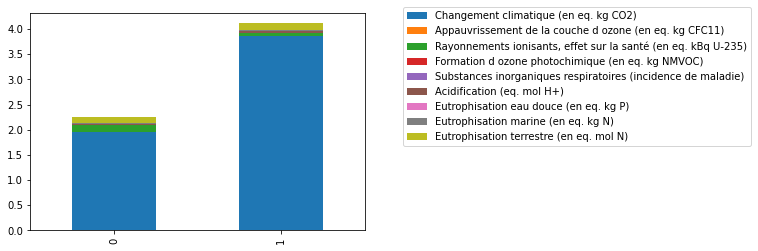

In [67]:
df_n_line_bio = pd.DataFrame([df_agri_tajine_bio.mean()], columns = ["Changement climatique (en eq. kg CO2)","Appauvrissement de la couche d ozone (en eq. kg CFC11)","Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)","Formation d ozone photochimique (en eq. kg NMVOC)","Substances inorganiques respiratoires (incidence de maladie)","Acidification (eq. mol H+)","Eutrophisation eau douce (en eq. kg P)","Eutrophisation marine (en eq. kg N)","Eutrophisation terrestre (en eq. mol N)"])
df_n_line_nonbio = pd.DataFrame([df_agri_tajine_nonbio.mean()], columns = ["Changement climatique (en eq. kg CO2)","Appauvrissement de la couche d ozone (en eq. kg CFC11)","Rayonnements ionisants, effet sur la santé (en eq. kBq U-235)","Formation d ozone photochimique (en eq. kg NMVOC)","Substances inorganiques respiratoires (incidence de maladie)","Acidification (eq. mol H+)","Eutrophisation eau douce (en eq. kg P)","Eutrophisation marine (en eq. kg N)","Eutrophisation terrestre (en eq. mol N)"])
df_compa_tajine= pd.concat([df_n_line_nonbio,df_n_line_bio],ignore_index= True)
df_compa_tajine
df_compa_tajine.plot(kind='bar', stacked = True).legend(bbox_to_anchor=(1.1,1.05))